### Placement Testing

Check locations, direction, label placement, rotate/flip, etc.

In [1]:
from functools import partial
import schemdraw
from schemdraw import elements as elm
from schemdraw import logic
from schemdraw.util import Point
#schemdraw.use('svg')
#schemdraw.settextmode('text')

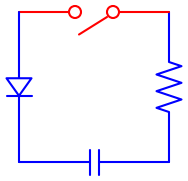

In [2]:
# Test directions. Should form square. Blue as default color.
with schemdraw.Drawing(color='blue', lw=1.5) as d:
    elm.Capacitor().right()
    elm.Resistor().up()
    elm.Switch().left().color('red')
    elm.Diode().down()

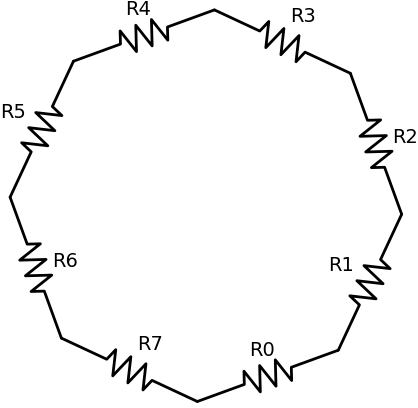

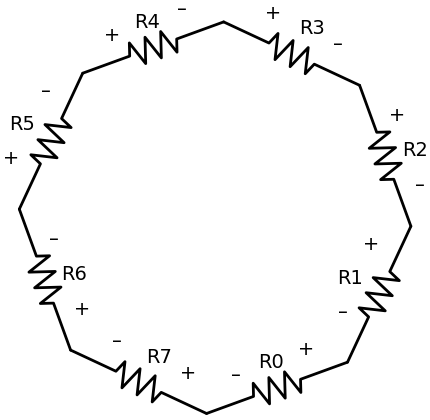

In [3]:
# Test label positioning & rotations/theta
with schemdraw.Drawing() as d:
    for i in range(8):
        elm.Resistor().theta(45*i+20).label('R%d'%i)

with schemdraw.Drawing() as d:
    for i in range(8):
        elm.Resistor().theta(45*i+20).label(('–','R%d'%i,'+'))

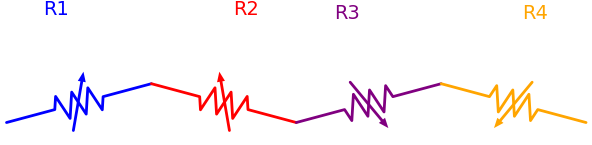

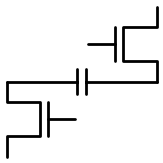

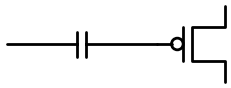

In [4]:
# Reverse and Flip, Colors
with schemdraw.Drawing() as d:
    elm.ResistorVar().theta(15).color('blue').label('R1', ofst=1)
    elm.ResistorVar().theta(-15).reverse().color('red').label('R2', ofst=1)
    elm.ResistorVar().theta(15).flip().color('purple').label('R3', ofst=1)
    elm.ResistorVar().theta(-15).flip().reverse().color('orange').label('R4', ofst=1)

# Reverse/flip 3-terminal
with schemdraw.Drawing() as d:
    f = elm.NFet()
    elm.Capacitor().at(f.drain)
    elm.NFet().reverse().anchor('source')

with schemdraw.Drawing(inches_per_unit=.5) as d:
    elm.Capacitor()
    elm.PFet().anchor('gate').reverse()

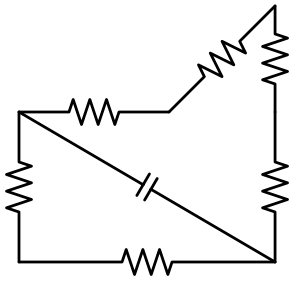

In [5]:
# to, tox, toy, endpoints
# Should be closed loop with cap along diagonal.
with schemdraw.Drawing() as d:
    R1 = elm.Resistor()
    R2 = elm.Resistor().theta(45)
    R3 = elm.Resistor().down().toy(R1.end)
    R4 = elm.Resistor().down()
    R5 = elm.Resistor().left().tox(R1.start)
    R6 = elm.Resistor().endpoints(R5.end, R1.start)
    C = elm.Capacitor(to=R4.end)

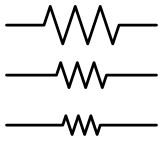

In [6]:
# Zoom/scale - on two-term elements it shouldn't change the length
with schemdraw.Drawing() as d:
    elm.Resistor().scale(.75).hold()
    d.move(dy=1)
    elm.Resistor().hold()
    d.move(dy=1)
    elm.Resistor().scale(1.5)

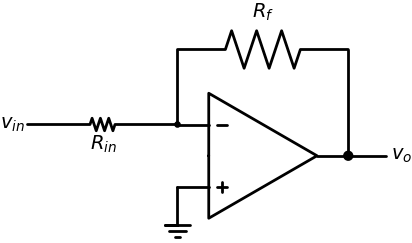

In [7]:
elm.style({'ResistorMini': partial(elm.Resistor, scale=.5),
           'ResistorJumbo': partial(elm.Resistor, scale=1.5)})
with schemdraw.Drawing() as d:
    op = elm.Opamp(leads=True)
    elm.Line().down().at(op.in2).length(d.unit/4)
    elm.Ground(lead=False)
    Rin = elm.ResistorMini().at(op.in1).left().idot().label('$R_{in}$', loc='bot').label('$v_{in}$', loc='left')
    elm.Line().up().at(op.in1).length(d.unit/2)
    elm.ResistorJumbo().tox(op.out).label('$R_f$')
    elm.Line().toy(op.out).dot()
    elm.Line().right().at(op.out).length(d.unit/4).label('$v_{o}$', loc='right')

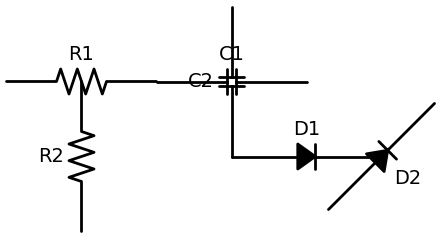

In [8]:
# Anchor Test
# R2 should start at the center of R1
# Capacitors have center at same point
# Tilted diode is centered on end of straight diode

with schemdraw.Drawing(inches_per_unit=.5) as d:
    R1 = elm.Resistor().label('R1')
    R2 = elm.Resistor().down().at(R1.center).label('R2')
    C1 = elm.Capacitor().right().at(R1.end).label('C1')
    C2 = elm.Capacitor().down().at(C1.center).anchor('center').label('C2')
    D1 = elm.Diode().right().fill('black').label('D1')
    D2 = elm.Diode().theta(45).anchor('center').at(D1.end).label('D2', 'bot').fill('black')

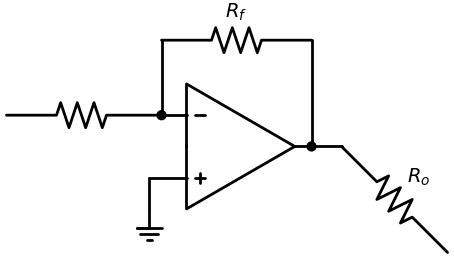

In [9]:
# Opamp, opamp anchor points
with schemdraw.Drawing(inches_per_unit=.5) as d:
    op = elm.Opamp()
    elm.Line().left().at(op.in1).length(d.unit/6)
    elm.Dot()
    elm.Line().up().length(d.unit/2)
    Rf = elm.Resistor().right().length(d.unit*1).label('$R_f$')

    ee = elm.Line().down().toy(op.out)
    ll = elm.Line().left().tox(op.out)
    elm.Dot().at(ll.start)
    out = elm.Line().right().length(d.unit/5)

    Rf = elm.Resistor().theta(-45).label('$R_o$')
    Rin = elm.Resistor().left().at(Point(op.in1)-Point((d.unit/5,0)))
    elm.Line().left().at(op.in2).length(d.unit/4)
    elm.Line().down().length(d.unit/5)
    elm.Ground()

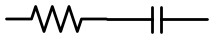

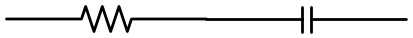

In [10]:
# Drawing unit effects default length of Element2Terms.
with schemdraw.Drawing(unit=2) as d:
    elm.Resistor()
    elm.Capacitor()

with schemdraw.Drawing(unit=4) as d:
    elm.Resistor()
    elm.Capacitor()

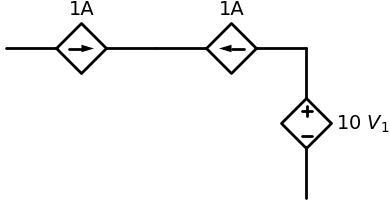

In [11]:
# Dependent sources
with schemdraw.Drawing() as d:
    elm.SourceControlledV().label('10 $V_1$', 'bot')
    elm.SourceControlledI().left().label('1A', 'top')
    elm.SourceControlledI().left().reverse().label('1A', 'top')

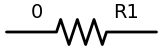

In [12]:
# Label location with offset
with schemdraw.Drawing() as d:
    R = (elm.Resistor()
              .label('R1', loc='center', ofst=(.9,.4))
              .label('0', loc='center', ofst=(-.9, .4)))

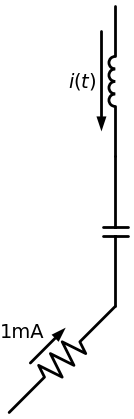

In [13]:
# Test current label arrows, reversing, length
# The 1mA current arrow should be same length as resistor, pointing up/right
# The i(t) arrow should point down (reverse of inductor 'up' direction)
with schemdraw.Drawing() as d:
    R = elm.Resistor().theta(45)
    elm.CurrentLabel(length=1).at(R).label('1mA')
    elm.Capacitor().up()
    L = elm.Inductor()
    elm.CurrentLabel().at(L).reverse().label('$i(t)$')

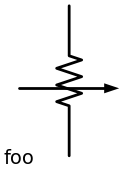

In [14]:
# Combination of providing .at as an XY position instead of element and giving a rotation
with schemdraw.Drawing() as d:
    d += (R:=elm.Resistor().down())
    d += elm.CurrentLabel(reverse=True).theta(180).at(R.center).label('foo', rotate=180, loc='bottom', ofst=(1, 1))

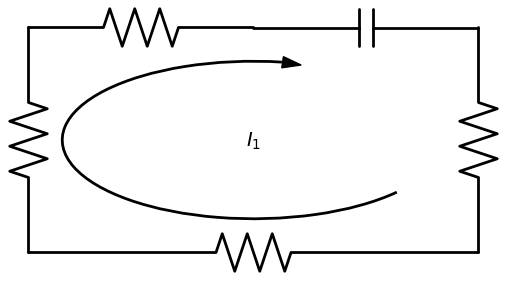

In [15]:
# Test loop current label
with schemdraw.Drawing(inches_per_unit=.75) as d:
    R1 = elm.Resistor()
    C = elm.Capacitor()
    R2 = elm.Resistor().down()
    R3 = elm.Resistor().left().tox(R1.start)
    R4 = elm.Resistor().up()
    elm.LoopCurrent([R1, R2, R3, R4], direction='cw', theta1=70, theta2=-20).label('$I_1$')

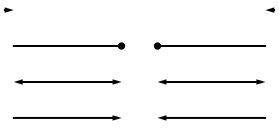

In [16]:
# Check reverse of Arrow and Line/Dot that have points referenced to start/end
d = schemdraw.Drawing()
d.add_elements(
    elm.Arrow(),
    elm.Arrow().at((4, 0)).reverse(),
    elm.Arrow(double=True).at((0, 1)),
    elm.Arrow(double=True).at((4, 1)).reverse(),
    elm.Line().at((0, 2)).dot(),
    elm.Line().at((4, 2)).reverse().idot(),
    elm.Arrowhead().at((0, 3)),
    elm.Arrowhead().at((7, 3)).reverse())
d

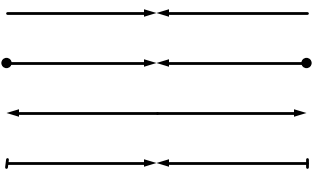

In [17]:
with schemdraw.Drawing():
    elm.Line(arrow='->')
    elm.Line(arrow='->').reverse()
    elm.Line(arrow='o->').at((0, -1))
    elm.Line(arrow='o->').reverse()
    elm.Line(arrow='<-').at((0, -2))
    elm.Line(arrow='<-').reverse()
    elm.Line(arrow='|->').at((0, -3))
    elm.Line(arrow='|->').reverse()

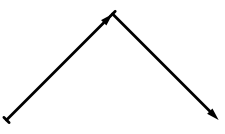

In [18]:
with schemdraw.Drawing():
    elm.Line(arrow='|->').theta(45)
    d.move(dx=.5)
    elm.Line(arrow='|->').theta(-45)

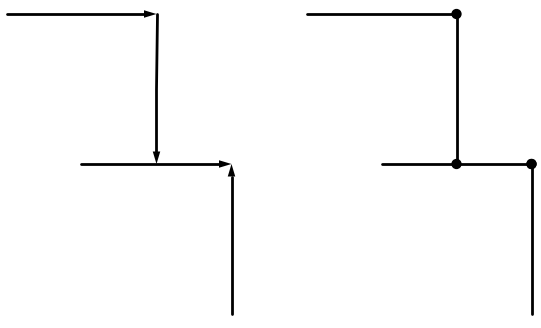

In [19]:
# Make sure Arrow/Line.dot anchor properly
with schemdraw.Drawing() as d:
    elm.Arrow()
    elm.Arrow().down()
    elm.Arrow().right().anchor('center')
    elm.Arrow().up().anchor('end')

    elm.Line().right().at((6, 0)).dot()
    elm.Line().down().dot()
    elm.Line().right().anchor('center').dot()
    elm.Line().up().anchor('end').dot()

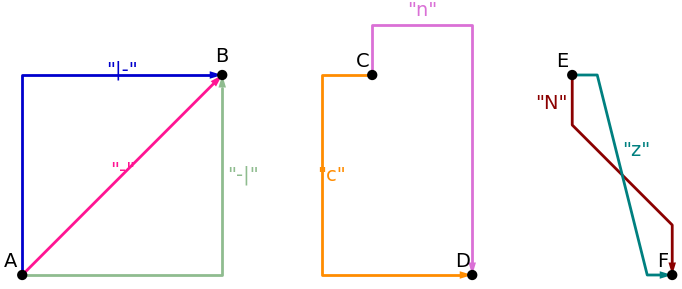

In [20]:
with schemdraw.Drawing():
    A = elm.Dot().label('A', halign='right', ofst=(-.1, 0))
    B = elm.Dot().label('B').at((4, 4))
    C = elm.Dot().label('C', ofst=(-.2, 0)).at((7, 4))
    D = elm.Dot().label('D', ofst=(-.2, 0)).at((9, 0))
    E = elm.Dot().label('E', ofst=(-.2, 0)).at((11, 4))
    F = elm.Dot().label('F', ofst=(-.2, 0)).at((13, 0))

    elm.Wire('-', arrow='->').at(A.center).to(B.center).color('deeppink').label('"-"')
    elm.Wire('|-', arrow='->').at(A.center).to(B.center).color('mediumblue').label('"|-"')
    elm.Wire('-|', arrow='->').at(A.center).to(B.center).color('darkseagreen').label('"-|"')
    elm.Wire('c', k=-1, arrow='->').at(C.center).to(D.center).color('darkorange').label('"c"', halign='left')
    elm.Wire('n', arrow='->').at(C.center).to(D.center).color('orchid').label('"n"')
    elm.Wire('N', arrow='->').at(E.center).to(F.center).color('darkred').label('"N"', 'start', ofst=(-.1, -.75))
    elm.Wire('z', k=.5, arrow='->').at(E.center).to(F.center).color('teal').label('"z"', halign='left', ofst=(0, .5))

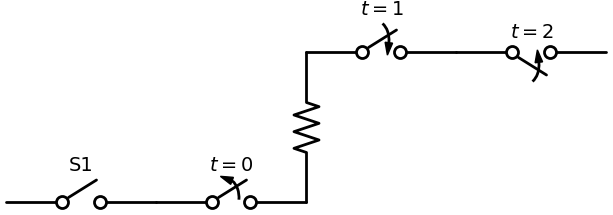

In [21]:
# Switches
with schemdraw.Drawing() as d:
    elm.Switch().label('S1')
    elm.Switch(action='open').label('$t=0$')
    elm.Resistor().up()
    elm.Switch(action='close').right().label('$t=1$')
    elm.Switch(action='close').right().flip().label('$t=2$')

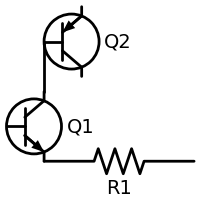

In [22]:
# BJT's
with schemdraw.Drawing() as d:
    Q1 = elm.BjtNpn(circle=True).label('Q1')
    elm.Line().up().length(1)
    Q2 = elm.BjtPnp(circle=True).right().label('Q2')
    elm.Resistor().at(Q1.emitter).label('R1', 'bot')

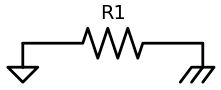

In [23]:
# Test grounds
with schemdraw.Drawing(inches_per_unit=.6):
    elm.GroundSignal()
    elm.Resistor().label('R1')
    elm.GroundChassis()

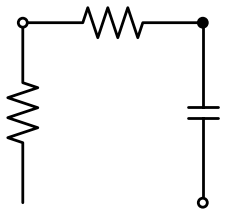

In [24]:
# Open and closed dots
with schemdraw.Drawing(inches_per_unit=.6):
    elm.Resistor().up()
    elm.Dot(open=True)
    elm.Resistor().right()
    elm.Dot()
    elm.Capacitor().down()
    elm.Dot(open=True)

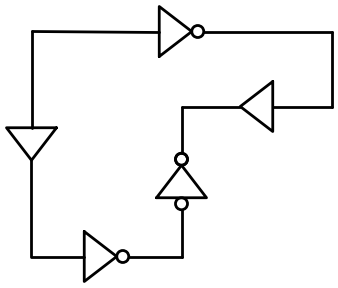

In [25]:
# Test lead extension of single input/output logic gates
with schemdraw.Drawing() as d:
    n = logic.Not()
    logic.NotNot().up()
    logic.Buf().right().reverse()
    logic.Line().up().length(d.unit/2)
    logic.Not().left().tox(n.start).reverse()
    logic.Buf().down().toy(n.start)

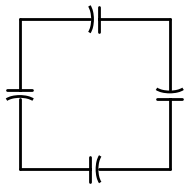

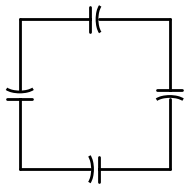

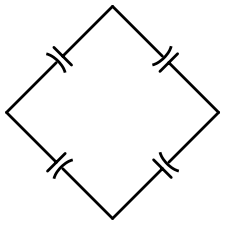

In [26]:
# Check arc drawing that broke with matplotlib 2.2
with schemdraw.Drawing() as d:
    elm.Capacitor2()
    elm.Capacitor2().up()
    elm.Capacitor2().left()
    elm.Capacitor2().down()

with schemdraw.Drawing() as d:
    elm.Capacitor2().reverse()
    elm.Capacitor2().up().reverse()
    elm.Capacitor2().left().reverse()
    elm.Capacitor2().down().reverse()

with schemdraw.Drawing() as d:
    elm.Capacitor2().theta(45)
    elm.Capacitor2().theta(135)
    elm.Capacitor2().theta(225)
    elm.Capacitor2().theta(-45)

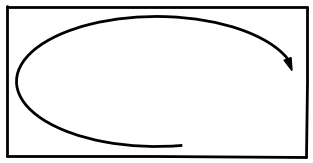

In [27]:
# Make sure arrow head is in correct place
with schemdraw.Drawing() as d:
    L1 = elm.Line().length(d.unit*2)
    L2 = elm.Line().down()
    L3 = elm.Line().left().tox(L1.start)
    L4 = elm.Line().up()
    elm.LoopCurrent([L1, L2, L3, L4], direction='cw', theta1=10, theta2=292)

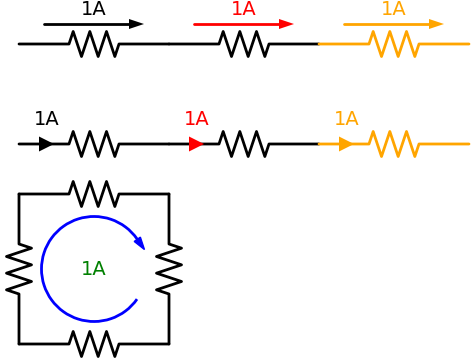

In [28]:
with schemdraw.Drawing() as d:
    R = elm.Resistor()
    elm.CurrentLabel().at(R).label('1A')
    R = elm.Resistor()
    elm.CurrentLabel().at(R).label('1A').color('red')  # Independent color
    R = elm.Resistor(color='orange')
    elm.CurrentLabel().at(R).label('1A')  # Inherit color from element

    R = elm.Resistor().at((0,-2))
    elm.CurrentLabelInline().at(R).label('1A')
    R = elm.Resistor()
    elm.CurrentLabelInline().at(R).label('1A').color('red')
    R = elm.Resistor(color='orange')
    elm.CurrentLabelInline().at(R).label('1A')

    R1 = elm.Resistor().at((0, -3))
    R2 = elm.Resistor().down()
    R3 = elm.Resistor().left()
    R4 = elm.Resistor().up()
    LL = elm.LoopCurrent((R1, R2, R3, R4)).label('1A').color('blue')
    d.push()
    LL.segments[1].color='green'   # Can still change color of individual segments

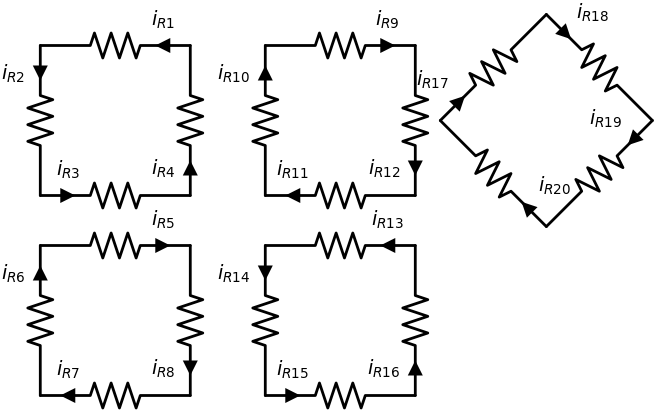

In [29]:
# Inline current arrows
with schemdraw.Drawing() as d:
    R1 = elm.Resistor().left()
    elm.CurrentLabelInline().at(R1.center).label('$i_{R1}$')  # Needs same direction as R1
    R2 = elm.Resistor().down()
    elm.CurrentLabelInline().at(R2.center).label('$i_{R2}$')
    R3 = elm.Resistor().right()
    elm.CurrentLabelInline().at(R3.center).label('$i_{R3}$')
    R4 = elm.Resistor().up()
    elm.CurrentLabelInline().at(R4.center).label('$i_{R4}$')

    R5 = elm.Resistor().left().at([0, -4])
    elm.CurrentLabelInline(direction='out').at(R5.center).label('$i_{R5}$')
    R6 = elm.Resistor().down()
    elm.CurrentLabelInline(direction='out').at(R6.center).label('$i_{R6}$')
    R7 = elm.Resistor().right()
    elm.CurrentLabelInline(direction='out').at(R7.center).label('$i_{R7}$')
    R8 = elm.Resistor().up()
    elm.CurrentLabelInline(direction='out').at(R8.center).label('$i_{R8}$')

    R9 = elm.Resistor().left().at([4.5, 0])
    elm.CurrentLabelInline(direction='out').at(R9.center).label('$i_{R9}$')
    R10 = elm.Resistor().down()
    elm.CurrentLabelInline(direction='out').at(R10.center).label('$i_{R10}$')
    R11 = elm.Resistor().right()
    elm.CurrentLabelInline(direction='out').at(R11.center).label('$i_{R11}$')
    R12 = elm.Resistor().up()
    elm.CurrentLabelInline(direction='out').at(R12.center).label('$i_{R12}$')

    R13 = elm.Resistor().left().at([4.5, -4])
    elm.CurrentLabelInline(direction='in').at(R13.center).label('$i_{R13}$')
    R14 = elm.Resistor().down()
    elm.CurrentLabelInline(direction='in').at(R14.center).label('$i_{R14}$')
    R15 = elm.Resistor().right()
    elm.CurrentLabelInline(direction='in').at(R15.center).label('$i_{R15}$')
    R16 = elm.Resistor().up()
    elm.CurrentLabelInline(direction='in').at(R16.center).label('$i_{R16}$')

    R17 = elm.Resistor().theta(45).at([5, -1.5])
    elm.CurrentLabelInline(direction='in').at(R17.center).label('$i_{R17}$')
    R18 = elm.Resistor().theta(-45)
    elm.CurrentLabelInline(direction='in').at(R18.center).label('$i_{R18}$')
    R19 = elm.Resistor().theta(-135)
    elm.CurrentLabelInline(direction='in').at(R19.center).label('$i_{R19}$')
    R20 = elm.Resistor().theta(-225)
    elm.CurrentLabelInline(direction='in').at(R20.center).label('$i_{R20}$')

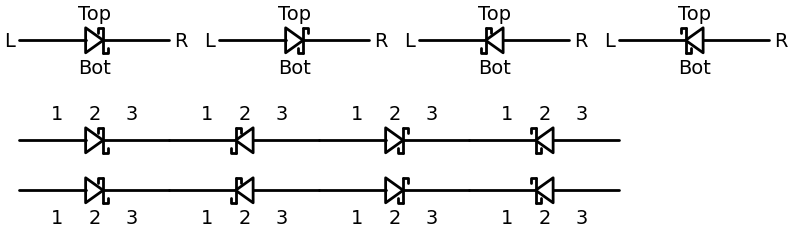

In [30]:
# Check that labels are drawn on the correct side
# with correct alignment
with schemdraw.Drawing() as d:
    elm.Schottky().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt')
    elm.Schottky().at([4,0]).flip().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt')
    elm.Schottky().at([8,0]).reverse().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt')
    elm.Schottky().at([12,0]).flip().reverse().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt')
    d.here = [0, -2]
    elm.Schottky().label(['1', '2', '3'])
    elm.Schottky().reverse().label(['1', '2', '3'])
    elm.Schottky().flip().label(['1', '2', '3'])
    elm.Schottky().flip().reverse().label(['1', '2', '3'])
    d.here = [0, -3]
    elm.Schottky().label(['1', '2', '3'], 'bot')
    elm.Schottky().reverse().label(['1', '2', '3'], 'bot')
    elm.Schottky().flip().label(['1', '2', '3'], 'bot')
    elm.Schottky().flip().reverse().label(['1', '2', '3'], 'bot')

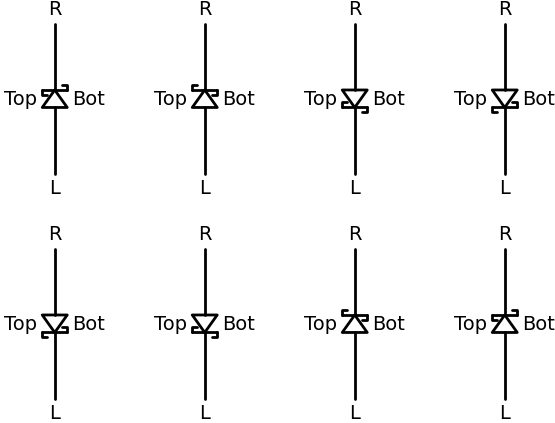

In [31]:
with schemdraw.Drawing() as d:
    elm.Schottky().up().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt')
    elm.Schottky().up().at([3,0]).flip().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt')
    elm.Schottky().up().at([6,0]).reverse().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt')
    elm.Schottky().up().at([9,0]).flip().reverse().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt')

    elm.Schottky().down().at([0,-1.5]).label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt')
    elm.Schottky().down().at([3,-1.5]).flip().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt')
    elm.Schottky().down().at([6,-1.5]).reverse().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt')
    elm.Schottky().down().at([9,-1.5]).flip().reverse().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt')

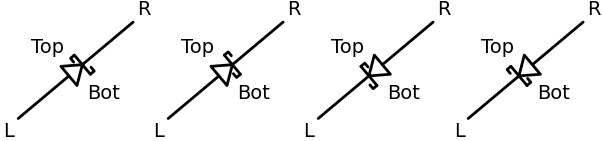

In [32]:
with schemdraw.Drawing() as d:
    elm.Schottky().theta(40).label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt')
    elm.Schottky().theta(40).at([3,0]).flip().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt')
    elm.Schottky().theta(40).at([6,0]).reverse().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt')
    elm.Schottky().theta(40).at([9,0]).flip().reverse().label('Top').label('Bot', 'bot').label('L', 'lft').label('R', 'rgt')

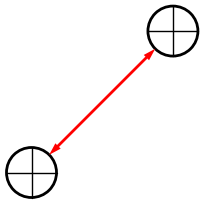

In [33]:
from schemdraw import dsp
with schemdraw.Drawing() as d:
    mx = dsp.Mixer().theta(45)
    elm.Arrow(double=True).color('red').zorder(10).theta(45)
    dsp.Mixer()

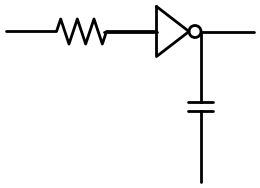

In [34]:
with schemdraw.Drawing() as d:
    elm.Resistor()
    q = logic.Not(anchor='in1')
    elm.Capacitor().at(q.out).down()

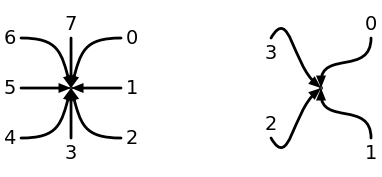

In [35]:
with schemdraw.Drawing():
    x = elm.Dot(radius=.01)

    elm.Annotate().at(x.center).label('0')
    elm.Annotate().at(x.center).delta(1, 0).label('1')
    elm.Annotate().at(x.center).delta(1, -1).label('2')
    elm.Annotate().at(x.center).delta(0, -1).label('3')
    elm.Annotate().at(x.center).delta(-1, -1).label('4')
    elm.Annotate().at(x.center).delta(-1, 0).label('5')
    elm.Annotate().at(x.center).delta(-1, 1).label('6')
    elm.Annotate().at(x.center).delta(0, 1).label('7')

    x = elm.Dot(radius=0.01).at((5, 0))
    elm.Annotate(th1=90, th2=-90).at(x.center).delta(1, 1).label('0')
    elm.Annotate(th1=90, th2=-90).at(x.center).delta(1, -1).label('1')
    elm.Annotate(th1=40, th2=120).at(x.center).delta(-1, -1).label('2')
    elm.Annotate(th1=40, th2=120).at(x.center).delta(-1, 1).label('3')